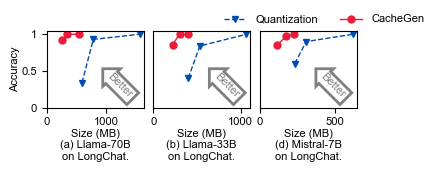

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]
H2O_COLOR = "forestgreen"
LLMLINGUA_COLOR = "violet"
def plot(csv, ax, title, xlabel, type, bottom_title = None,
                      need_y_label=False, need_legend=-1):

    data = json.load(open(csv))
    lines = []
    lines += [ax.plot(data[f'quant_{type}'], data['quant_quality'], c=BETTER_BASELINE_COLOR, marker="v",  label="Quantization", ls="--", markersize=5)]

    lines+=[ax.plot(data[f'cachegen_{type}'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen", markersize=5)]
    # if type != "ttft":
    # lines += [ax.plot(data[f'h2o_{type}'], data[f'h2o_quality'], marker="v", c=H2O_COLOR, label="H2O", markersize=3)]
    # # lines += [ax.plot(data[f'h2o_cg_{type}'], data[f'h2o_cg_quality'], marker="o", c="skyblue", label="CacheGen+H2O", ls="--", markersize=3)]
    # lines += [ax.plot(data[f'h2o_cg2_{type}'], data[f'h2o_cg2_quality'], marker="o", c=H2O_COLOR, markersize=3, label='CacheGen+H2O')] 
    # # lines += [ax.plot(data[f'h2o_cg3_{type}'], data[f'h2o_cg3_quality'], marker="o", c="skyblue", ls="--", markersize=3)] 
    # lines += [ax.scatter(data[f'llmlingua_{type}'], data[f'llmlingua_quality'], marker="*", c=LLMLINGUA_COLOR, label="LLMLingua", s=30)]
    # lines += [ax.plot(data[f'llmlingua_cg_{type}'], data[f'llmlingua_cg_quality'], marker="o", c=LLMLINGUA_COLOR, label="CacheGen + LLMLingua", ls="-", markersize=3)]
    
    
    # ax.set_title(title, fontsize=fontsize)
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_yticks([])
    ax.set_ylabel("")
    if need_y_label:
        ax.set_ylabel("Accuracy",
                      fontsize=fontsize, labelpad=1)
        ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=fontsize)
    if need_legend >= 0:
        # if type=="size":
        #     ax.legend(loc="upper right", frameon=False,
        #                 bbox_to_anchor=[2.7, 1.4], ncol=4)
        if type=="size":
            ax.legend(loc="upper right", frameon=False,
                        bbox_to_anchor=[2.5, 1.4], ncol=4)
    # t = ax.text(0.1, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
    if xlabel=="Size (MB)":
        ax.set_xlabel(xlabel + "\n " + bottom_title, labelpad=1)
    else:
        ax.set_xlabel(xlabel, labelpad=1)
    
    ax.set_xlim(left=0)
    # ax.set_xscale("log")

fig, axes = plt.subplots(1, 3, figsize=(4, 1))
plt.subplots_adjust(wspace=0.1, hspace=0.6)

cur_type = "size"
plot('longchat_7B.json', axes[2], "Llama-7B", "Size (MB)",bottom_title="(d) Mistral-7B \non LongChat.", type=cur_type, )
# plt.text(0.01, 0.01, '(a) Llama-7B on LongChat.', transform=plt.gca().transAxes, ha='left', va='bottom')

# plot('longchat_13B.json', axes[2], "Llama-13B", "Size (MB)",  bottom_title="(c) Llama-13B on LongChat.", type=cur_type)
plot('longchat_30B.json', axes[1], "Llama-33B", "Size (MB)", bottom_title="(b) Llama-33B \non LongChat.", type=cur_type)
plot('longchat_70B.json', axes[0], "Llama-70B", "Size (MB)", bottom_title="(a) Llama-70B \non LongChat.", need_y_label=True,   need_legend=True, type=cur_type)
for ax in axes:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.1, "Better", ha="right", 
                va="bottom", rotation=-45, bbox=bbox_props, c='grey',
                transform=ax.transAxes)
# for ax in axes[1]:
#     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
#     t = ax.text(0.9, 0.1, "Better", ha="right", 
#                 va="bottom", rotation=-45, bbox=bbox_props, c='grey',
#                 transform=ax.transAxes)

# fig, axes = plt.subplots(1, 4, figsize=(8.2, 1))
# plt.subplots_adjust(wspace=0.1, hspace=0.8)
axes[0].legend(bbox_to_anchor=(4, 1.34), ncol=4, frameon=False)

cur_type = "ttft"
# plot('longchat_7B.json', axes[0][3], "Llama-7B", "TTFT (s)", type=cur_type, bottom_title="(a) Llama-7B on LongChat.", need_legend=True)
# plot('longchat_13B.json', axes[0][2], "Llama-13B", "TTFT (s)", bottom_title="(b) Llama-13B on LongChat.", type=cur_type)
# plot('longchat_30B.json', axes[0][1], "Llama-33B", "TTFT (s)", bottom_title="(c) Llama-33B on LongChat.", type=cur_type)
# plot('longchat_70B.json', axes[0][0], "Llama-70B", "TTFT (s)", bottom_title="(d) Llama-70B on LongChat.",need_y_label=True, type=cur_type)

# for ax in axes:
#     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
#     t = ax.text(0.9, 0.1, "Better", ha="right", 
#                 va="bottom", rotation=-45, bbox=bbox_props, c='grey',
#                 transform=ax.transAxes)
fig.savefig("fig-e2e-longchat-quant.pdf", bbox_inches="tight", transparent=True)

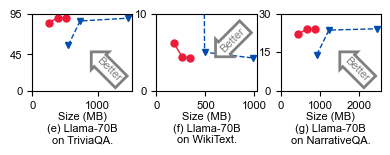

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=4

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]
H2O_COLOR = "forestgreen"
LLMLINGUA_COLOR = "violet"
def plot(csv, ax, title, xlabel, type, bottom_title = None,
                      need_y_label=False, need_legend=-1):

    data = json.load(open(csv))
    lines = []
    lines += [ax.plot(data[f'quant_{type}'], data['quant_quality'], c=BETTER_BASELINE_COLOR, marker="v",  label="", ls="--", markersize=5)]
    if type == "ttft":
        lines += [ax.plot(data[f'text_{type}'], data[f'text_quality'], marker="x", c=BETTER_BASELINE_COLOR, label="Text", markersize=6)]

    lines+=[ax.plot(data[f'cachegen_{type}'], data[f'cachegen_quality'], marker="o", c=SYS_COLOR, label="CacheGen + LLMlingua", markersize=5)]

    # ax.set_ylim(bottom=0, top=30)
    ax.set_yticks([])
    ax.set_ylabel("")
    if need_y_label:
        
        if title == "NQA":
            ax.set_yticks([0, 15, 30], [0, 15, 30], fontsize=fontsize)
            # ax.set_ylabel("F1 score (%)",
            #           fontsize=fontsize, labelpad=1)
        elif title == "TQA":
            ax.set_yticks([0, 45, 95], [0,45, 95], fontsize=fontsize)
            # ax.set_ylabel("F1 score (%)",
            #           fontsize=fontsize, labelpad=1)
        else:
            ax.set_ylim((0, 10))
            ax.set_yticks([0, 10], [0, 10], fontsize=fontsize)
            # ax.set_ylabel("Perplexity",
            #           fontsize=fontsize, labelpad=1)
    if need_legend >= 0:
        # if type=="size":
        #     ax.legend(loc="upper right", frameon=False,
        #                 bbox_to_anchor=[2.7, 1.4], ncol=4)
        if type=="ttft":
            ax.legend(loc="upper right", frameon=False,
                        bbox_to_anchor=[3, 1.4], ncol=4)
    # t = ax.text(0.1, 0.1, title, c='black', transform=ax.transAxes, fontsize=fontsize + 1, weight="bold")
    if xlabel=="Size (MB)":
        ax.set_xlabel(xlabel + "\n " + bottom_title, labelpad=1)
    else:
        ax.set_xlabel(xlabel, labelpad=1)
    
    ax.set_xlim(left=0)
    # ax.set_xscale("log")

fig, axes = plt.subplots(1, 3, figsize=(4.5, 1))
plt.subplots_adjust(wspace=0.24, hspace=0.6)

cur_type = "size"
plot('tqa.json', axes[0], "TQA", "Size (MB)", type=cur_type,  bottom_title="(e) Llama-70B \non TriviaQA.",
     need_y_label=True, need_legend=True)
plot('wikitext.json', axes[1], "Wikitext", "Size (MB)", bottom_title="(f) Llama-70B \non WikiText.",type=cur_type, need_y_label=True,)

plot('nqa.json', axes[2], "NQA", "Size (MB)", bottom_title="(g) Llama-70B \non NarrativeQA.",type=cur_type,need_y_label=True,)



for ax in [axes[0], axes[2]]:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.1, "Better", ha="right", 
                va="bottom", rotation=-45, bbox=bbox_props, c='grey',
                transform=ax.transAxes)
# for ax in [axes[1][0], axes[1,2]]:
#     bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
#     t = ax.text(0.9, 0.1, "Better", ha="right", 
#                 va="bottom", rotation=-45, bbox=bbox_props, c='grey',
#                 transform=ax.transAxes)

    
for ax in [axes[1]]:
    bbox_props = dict(boxstyle="larrow", fc=(1,1,1), ec="grey", lw=2)
    t = ax.text(0.9, 0.48, "Better", ha="right", 
               va="bottom", rotation=45, bbox=bbox_props, c='grey',
               transform=ax.transAxes)
# fig, axes = plt.subplots(1, 4, figsize=(8.2, 1))
# plt.subplots_adjust(wspace=0.1, hspace=0.8)
cur_type = "ttft"
# plot('tqa.json', axes[0][0], "TQA", "TTFT (s)", type=cur_type,
#      need_y_label=True, need_legend=True)
# plot('wikitext.json', axes[0][1], "Wikitext", "TTFT (s)", type=cur_type, 
#      need_y_label=True)
# plot('nqa.json', axes[0][2], "NQA", "TTFT (s)", type=cur_type, need_y_label=True,)
fig.savefig("fig-e2e-wikitext-quant.pdf", bbox_inches="tight", transparent=True)